## ターゲット変数の分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data_modified/iot.csv')
print(df.shape)
df.head()

(53759, 27)


,unit_ID,cycles,time_to_deterioration,setting_1,setting_2,setting_3,T2,T24,T30,T50,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,148,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,147,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,146,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,145,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,144,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


### unit_ID別の交換時期分布

In [5]:
# 各unitのlifetime
df_lifetime = pd.DataFrame(df['unit_ID'].value_counts()).reset_index()
print(df_lifetime.shape)
df_lifetime.columns = ['unit_ID', 'lifetime']
df_lifetime = df_lifetime.sort_values('unit_ID').reset_index(drop=True)
df_lifetime

(260, 2)


,unit_ID,lifetime
0,1,149
1,2,269
2,3,206
3,4,235
4,5,154
...,...,...
255,256,163
256,257,309
257,258,143
258,259,205


In [6]:
df_lifetime['lifetime'].describe()

count    260.000000
mean     206.765385
std       46.782198
min      128.000000
25%      174.000000
50%      199.000000
75%      230.250000
max      378.000000
Name: lifetime, dtype: float64

In [7]:
df_lifetime['lifetime'].quantile([i/10 for i in range(11)])

0.0    128.0
0.1    154.0
0.2    166.8
0.3    180.7
0.4    190.0
0.5    199.0
0.6    207.0
0.7    221.0
0.8    239.4
0.9    271.1
1.0    378.0
Name: lifetime, dtype: float64

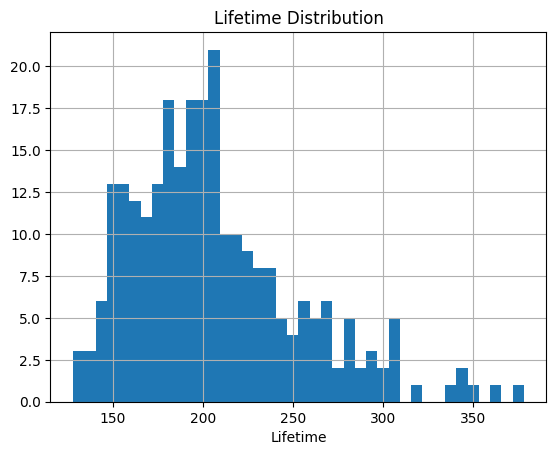

In [10]:
#plt.figure(figsize=(7, 3))
plt.hist(df_lifetime['lifetime'], bins=40)
plt.grid(True)

plt.xlabel('Lifetime') 
plt.title('Lifetime Distribution')
plt.show()

### 各cycleにおける交換までの残りCycle

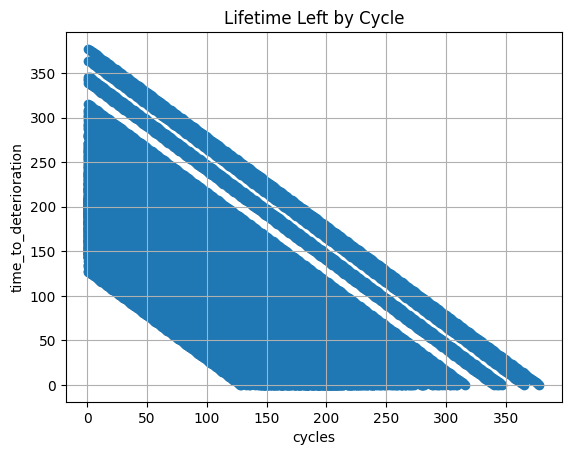

In [21]:
plt.scatter(df['cycles'], df['time_to_deterioration'])

plt.grid(True)

plt.xlabel('cycles') 
plt.ylabel('time_to_deterioration') 
plt.title('Lifetime Left by Cycle')
plt.show()

In [23]:
df['cycles'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [25]:
mean_at_cycle = []
num_unit = []
for cyc in df['cycles'].unique():
    tmp = df[df['cycles']==cyc]
    mean_at_cycle.append(tmp['time_to_deterioration'].mean())
    num_unit.append(tmp.shape[0])
len(mean_at_cycle), len(num_unit)

(378, 378)

In [28]:
# 各Cycleのおける、time_to_deteriorationの平均値
df_avglt = pd.DataFrame({
    'cycles' : df['cycles'].unique(),
    'survived_unit_num' : num_unit,
    'mean_left_lifetime' : mean_at_cycle
})
df_avglt

,cycles,survived_unit_num,mean_left_lifetime
0,1,260,205.765385
1,2,260,204.765385
2,3,260,203.765385
3,4,260,202.765385
4,5,260,201.765385
...,...,...,...
373,374,1,4.000000
374,375,1,3.000000
375,376,1,2.000000
376,377,1,1.000000


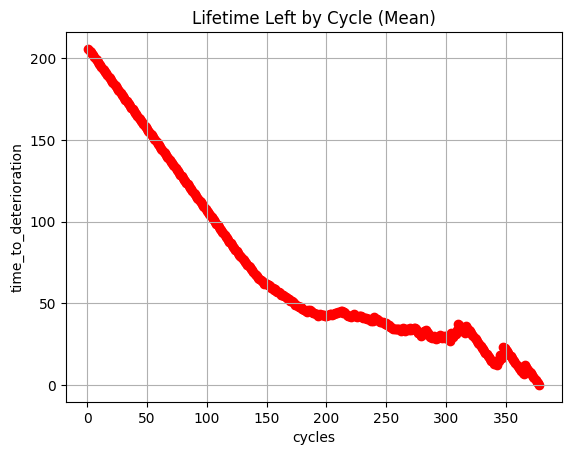

In [33]:
plt.scatter(df_avglt['cycles'], df_avglt['mean_left_lifetime'], color='red')

plt.grid(True)

plt.xlabel('cycles') 
plt.ylabel('time_to_deterioration') 
plt.title('Lifetime Left by Cycle (Mean)')
plt.show()

In [34]:
ax = df_ttd.plot(kind='scatter', x='cycles', y='time_to_deterioration', grid=True, label='each unit')
df_avglt.plot(kind='scatter', x='cycles', y='mean_left_lifetime', grid=True, color='red', label='average', ax=ax)

plt.xlabel('cycles')
plt.ylabel('time_to_deterioration')
plt.title('Lifetime left by cycles')
plt.legend()
plt.show()

NameError: name 'df_ttd' is not defined

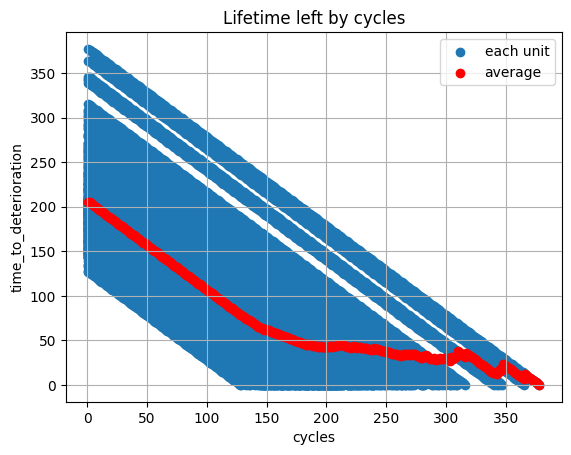

In [37]:
# 上記2つのプロットを重ね書き

plt.scatter(df['cycles'], df['time_to_deterioration'], label='each unit')
plt.scatter(df_avglt['cycles'], df_avglt['mean_left_lifetime'], color='red', label='average')

plt.grid(True)

plt.xlabel('cycles')
plt.ylabel('time_to_deterioration')
plt.title('Lifetime left by cycles')
plt.legend()
plt.show()

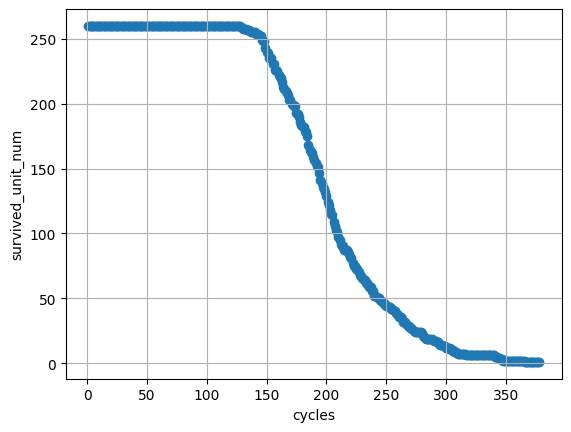

In [41]:
# cycleが増えていくと生き残っているunitが少なくなることに注意
plt.scatter(df_avglt['cycles'], df_avglt['survived_unit_num'])
plt.grid(True)
plt.xlabel('cycles')
plt.ylabel('survived_unit_num')
plt.show()